In [1]:
import sys
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

In [3]:
from agent import MABAgent
from agent import get_concept_drift
from agent import code_action

In [4]:
data = '../sarss.h5'

In [5]:
n_actions = 11 * 15

In [6]:
agent = MABAgent(n_actions=n_actions)

In [7]:
data_all = pd.read_hdf(data, key='sarss')
# process only traffic from both stations going to google
data = data_all[data_all['sites'] == ('google', 'google')]
columns_to_convert = ['new_channel', 'new_txpower', 'r']
# generates warning >> SettingWithCopyWarning
data.loc[:, columns_to_convert] = data.loc[:, columns_to_convert].astype('float')

drifts = get_concept_drift(data)  # get drift points from data

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


# MAB iterations

In [8]:
t = 1
T = 2
double_trick = True
__iterations = []

n = data.shape[0]
n = 1800
for __iter in range(n):
    __d = data.iloc[__iter, :]
    """
        a) get data from real execution, including the action performed --ea
        b) get action proposed by the algorithm -- a
        c) compare result: ea == a ?
        d) probability of selecting ea?
        e) concept drift? yes, mark this point
        f) update system using pa, so the system learns the real environment

    """
    new_channel = float(__d['new_channel'])
    new_txpower = float(__d['new_txpower'])

    a = agent.get_action()  # best action using the current knowledge
    ea = code_action(new_channel, new_txpower)  # action performed

    Pa = agent.prob_action(a) * 100
    Pea = agent.prob_action(ea) * 100

    r = __d['r']  # reward received
    drift = __iter in drifts
    print('{} t: {} ch{} pwr {} Estimated action: {}[P={}] Actual action: {}[P={}] Reward: {} Drift {}'.format(__iter, t, new_channel, new_txpower, ea, Pea, a, Pa, r, drift))

    __iterations.append([__iter, t, new_channel, new_txpower, ea, Pea, a, Pa, r, drift])
    # don't need to run_action
    # r, success = agent.run_action(a)
    agent.update(ea, r)  # update using the executed action in order to learn

    t += 1
    if double_trick and t > T:
        t = 1
        agent.reset_pulls()
        try:
            T = 2 * T
        except OverflowError:
            T = args.T

0 t: 1 ch2.0 pwr 8.0 Estimated action: 82[P=0.6060606060606061] Actual action: 0[P=0.6060606060606061] Reward: 5.0 Drift False
1 t: 2 ch2.0 pwr 8.0 Estimated action: 82[P=39.061642643208785] Actual action: 82[P=39.061642643208785] Reward: 4.5117215 Drift False
2 t: 1 ch2.0 pwr 8.0 Estimated action: 82[P=41.48367793631152] Actual action: 82[P=41.48367793631152] Reward: 4.56176425 Drift False
3 t: 2 ch2.0 pwr 8.0 Estimated action: 82[P=26.94510449271934] Actual action: 82[P=26.94510449271934] Reward: 4.56176425 Drift False
4 t: 3 ch2.0 pwr 8.0 Estimated action: 82[P=22.089620980078912] Actual action: 82[P=22.089620980078912] Reward: 4.56176425 Drift False
5 t: 4 ch2.0 pwr 8.0 Estimated action: 82[P=19.06495931634829] Actual action: 82[P=19.06495931634829] Reward: 3.820358 Drift False
6 t: 1 ch2.0 pwr 8.0 Estimated action: 82[P=35.50369744883907] Actual action: 82[P=35.50369744883907] Reward: 3.4367145 Drift False
7 t: 2 ch2.0 pwr 8.0 Estimated action: 82[P=18.087725041274368] Actual acti

250 t: 125 ch3.0 pwr 1.0 Estimated action: 13[P=2.9173216104915434] Actual action: 13[P=2.9173216104915434] Reward: 4.64237475 Drift False
251 t: 126 ch3.0 pwr 1.0 Estimated action: 13[P=2.9110601455511884] Actual action: 13[P=2.9110601455511884] Reward: 4.64237475 Drift False
252 t: 127 ch3.0 pwr 1.0 Estimated action: 13[P=2.904859342254007] Actual action: 13[P=2.904859342254007] Reward: 4.64237475 Drift False
253 t: 128 ch3.0 pwr 1.0 Estimated action: 13[P=2.898718122413331] Actual action: 13[P=2.898718122413331] Reward: 4.64237475 Drift False
254 t: 1 ch3.0 pwr 1.0 Estimated action: 13[P=30.6561343011921] Actual action: 13[P=30.6561343011921] Reward: 4.64237475 Drift False
255 t: 2 ch3.0 pwr 1.0 Estimated action: 13[P=14.394112970044015] Actual action: 13[P=14.394112970044015] Reward: 4.64237475 Drift False
256 t: 3 ch3.0 pwr 1.0 Estimated action: 13[P=11.436316742753569] Actual action: 13[P=11.436316742753569] Reward: 4.64237475 Drift False
257 t: 4 ch3.0 pwr 1.0 Estimated action: 

458 t: 205 ch3.0 pwr 1.0 Estimated action: 13[P=2.5200841718939224] Actual action: 13[P=2.5200841718939224] Reward: 4.7133495 Drift False
459 t: 206 ch3.0 pwr 1.0 Estimated action: 13[P=2.5170537192169817] Actual action: 13[P=2.5170537192169817] Reward: 4.7133495 Drift False
460 t: 207 ch3.0 pwr 1.0 Estimated action: 13[P=2.5140419303949364] Actual action: 13[P=2.5140419303949364] Reward: 4.7133495 Drift False
461 t: 208 ch3.0 pwr 1.0 Estimated action: 13[P=2.5110485919302383] Actual action: 13[P=2.5110485919302383] Reward: 4.7133495 Drift False
462 t: 209 ch3.0 pwr 1.0 Estimated action: 13[P=2.508073493861671] Actual action: 13[P=2.508073493861671] Reward: 4.7133495 Drift False
463 t: 210 ch3.0 pwr 1.0 Estimated action: 13[P=2.5051164296885418] Actual action: 13[P=2.5051164296885418] Reward: 4.7133495 Drift False
464 t: 211 ch3.0 pwr 1.0 Estimated action: 13[P=2.502177196296877] Actual action: 13[P=2.502177196296877] Reward: 4.7133495 Drift False
465 t: 212 ch3.0 pwr 1.0 Estimated act

662 t: 153 ch3.0 pwr 1.0 Estimated action: 13[P=2.7546360528572644] Actual action: 13[P=2.7546360528572644] Reward: 4.7252125 Drift False
663 t: 154 ch3.0 pwr 1.0 Estimated action: 13[P=2.749714069821325] Actual action: 13[P=2.749714069821325] Reward: 4.7252125 Drift False
664 t: 155 ch3.0 pwr 1.0 Estimated action: 13[P=2.7448358150841035] Actual action: 13[P=2.7448358150841035] Reward: 4.7252125 Drift False
665 t: 156 ch3.0 pwr 1.0 Estimated action: 13[P=2.740000607515651] Actual action: 13[P=2.740000607515651] Reward: 4.7252125 Drift False
666 t: 157 ch3.0 pwr 1.0 Estimated action: 13[P=2.7352077809505566] Actual action: 13[P=2.7352077809505566] Reward: 4.7252125 Drift False
667 t: 158 ch3.0 pwr 1.0 Estimated action: 13[P=2.730456683765609] Actual action: 13[P=2.730456683765609] Reward: 4.7252125 Drift False
668 t: 159 ch3.0 pwr 1.0 Estimated action: 13[P=2.725746678471813] Actual action: 13[P=2.725746678471813] Reward: 4.7252125 Drift False
669 t: 160 ch3.0 pwr 1.0 Estimated action:

1053 t: 32 ch1.0 pwr 5.0 Estimated action: 51[P=6.0860263633964236] Actual action: 51[P=6.0860263633964236] Reward: 4.69824125 Drift False
1054 t: 33 ch1.0 pwr 5.0 Estimated action: 51[P=6.016612360450898] Actual action: 51[P=6.016612360450898] Reward: 4.69824125 Drift False
1055 t: 34 ch1.0 pwr 5.0 Estimated action: 51[P=5.94913729402506] Actual action: 51[P=5.94913729402506] Reward: 4.69824125 Drift False
1056 t: 35 ch1.0 pwr 5.0 Estimated action: 51[P=5.883617804686286] Actual action: 51[P=5.883617804686286] Reward: 4.55512275 Drift False
1057 t: 36 ch1.0 pwr 5.0 Estimated action: 51[P=5.788743299505346] Actual action: 51[P=5.788743299505346] Reward: 4.51673825 Drift False
1058 t: 37 ch1.0 pwr 5.0 Estimated action: 51[P=5.691000683151012] Actual action: 51[P=5.691000683151012] Reward: 4.51673825 Drift False
1059 t: 38 ch1.0 pwr 5.0 Estimated action: 51[P=5.598693804703214] Actual action: 51[P=5.598693804703214] Reward: 4.5117215 Drift False
1060 t: 39 ch1.0 pwr 5.0 Estimated action:

1241 t: 220 ch1.0 pwr 5.0 Estimated action: 51[P=2.7853268672343745] Actual action: 51[P=2.7853268672343745] Reward: 4.69952825 Drift False
1242 t: 221 ch1.0 pwr 5.0 Estimated action: 51[P=2.781242064591099] Actual action: 51[P=2.781242064591099] Reward: 4.693564875 Drift False
1243 t: 222 ch1.0 pwr 5.0 Estimated action: 51[P=2.7771054587226915] Actual action: 51[P=2.7771054587226915] Reward: 4.693564875 Drift False
1244 t: 223 ch1.0 pwr 5.0 Estimated action: 51[P=2.7729940497167442] Actual action: 51[P=2.7729940497167442] Reward: 4.693564875 Drift False
1245 t: 224 ch1.0 pwr 5.0 Estimated action: 51[P=2.7689075804674483] Actual action: 51[P=2.7689075804674483] Reward: 4.693564875 Drift False
1246 t: 225 ch1.0 pwr 5.0 Estimated action: 51[P=2.764845797494055] Actual action: 51[P=2.764845797494055] Reward: 4.693564875 Drift False
1247 t: 226 ch1.0 pwr 5.0 Estimated action: 51[P=2.7608084508763664] Actual action: 51[P=2.7608084508763664] Reward: 4.693564875 Drift True
1248 t: 227 ch1.0 p

1708 t: 687 ch5.0 pwr 8.0 Estimated action: 85[P=2.174566441347914] Actual action: 85[P=2.174566441347914] Reward: 4.704276375 Drift False
1709 t: 688 ch5.0 pwr 8.0 Estimated action: 85[P=2.1723632280534337] Actual action: 85[P=2.1723632280534337] Reward: 4.704276375 Drift False
1710 t: 689 ch5.0 pwr 8.0 Estimated action: 85[P=2.1701746932829438] Actual action: 85[P=2.1701746932829438] Reward: 4.704276375 Drift False
1711 t: 690 ch5.0 pwr 8.0 Estimated action: 85[P=2.1680006441109114] Actual action: 85[P=2.1680006441109114] Reward: 4.772949125 Drift False
1712 t: 691 ch5.0 pwr 8.0 Estimated action: 85[P=2.166627587210218] Actual action: 85[P=2.166627587210218] Reward: 4.772949125 Drift False
1713 t: 692 ch5.0 pwr 8.0 Estimated action: 85[P=2.165258940571593] Actual action: 85[P=2.165258940571593] Reward: 4.772949125 Drift False
1714 t: 693 ch5.0 pwr 8.0 Estimated action: 85[P=2.163894687227073] Actual action: 85[P=2.163894687227073] Reward: 4.772949125 Drift False
1715 t: 694 ch5.0 pwr

# Plot evolution

In [9]:
drifts_inGraph = np.array(drifts)
drifts_inGraph = drifts_inGraph[drifts_inGraph < n]

In [13]:
# drifts_inGraph

In [11]:
def plot_drifts(drifts, _max, _min=0):
    for x in drifts:
        plt.plot([x, x], [_min, _max], color='green')

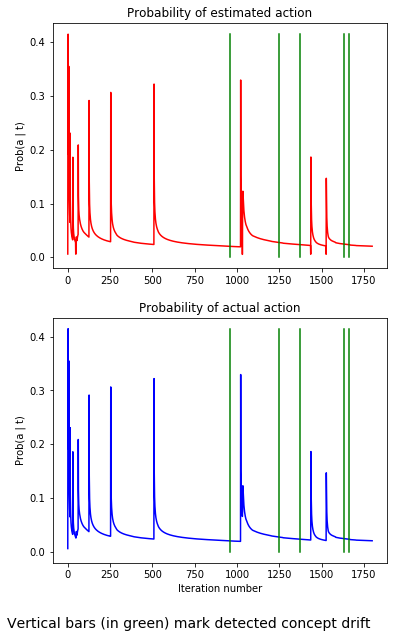

In [12]:
ax = plt.gca()

x = [v[0] for v in __iterations]
p1 = [v[5] / 100.0 for v in __iterations]
p2 = [v[7] / 100.0 for v in __iterations]

max_y = max(np.max(p1), np.max(p2))

plt.subplot(2, 1, 1)
plt.plot(x, p1, "-", label='Estimated', color='red')  # ":"
plot_drifts(drifts_inGraph, max_y)
plt.title("Probability of estimated action")
plt.ylabel("Prob(a | t)")

plt.subplots_adjust(top=2)

plt.subplot(2, 1, 2)
plt.plot(x, p2, "-", label='Actual', color='blue')  # "--"
plot_drifts(drifts_inGraph, max_y)
plt.title("Probability of actual action")
plt.ylabel("Prob(a | t)")
_ = plt.xlabel("Iteration number")

_ = plt.text(0.02, -0.1, 'Vertical bars (in green) mark detected concept drift', fontsize=14, transform=plt.gcf().transFigure)